# Calcular o drawdown máximo de um ativo

## 1.0 Bibliotecas

In [1]:
import yfinance            as yf
import datetime            as dt

import matplotlib.pyplot   as plt
import matplotlib.ticker   as mtick
import matplotlib.dates    as mdate

import mplcyberpunk # biblioteca de estilização de gráficos

plt.style.use('cyberpunk') # ativando o cyberpunk

## 2.0 Obtendo os dados

In [3]:
dt_final = dt.datetime.now() # definindo a data atual como a data final
dt_inicial = dt_final - dt.timedelta(days = 1500) # definindo o período de análise em relação a data atual, no caso 1500 dias

ativo = 'PETR4.SA' # definindo o ativo de interesse. *OBS: incluir '.SA' para o yfinance encontrar o ativo brasileiro

precos = yf.download(ativo, dt_inicial, dt_final)['Adj Close']

precos

[*********************100%***********************]  1 of 1 completed


Date
2019-04-23    11.324907
2019-04-24    11.292174
2019-04-25    11.373999
2019-04-26    11.156800
2019-04-29    11.205933
                ...    
2023-05-25    26.450001
2023-05-26    26.799999
2023-05-29    26.690001
2023-05-30    26.389999
2023-05-31    26.120001
Name: Adj Close, Length: 1021, dtype: float64

## 3.0 Calculando o drawdown

In [5]:
preco_max = precos.cummax() # para cada linha, busca o preço máximo até aquela data
drawdowns = precos/preco_max - 1 # calcula a variação entre a Máxima histórica até a data em questão e o preço atual, subtrai-se 1 para tornar o resultado negativo
drawdown_maximo = drawdowns.min() # '.min()' retorna a maior variação negativa (maior drawdown)

print(drawdown_maximo) # exibe o maior drawdown no período

-0.633560469255263


## 4.0 Exibindo graficamente

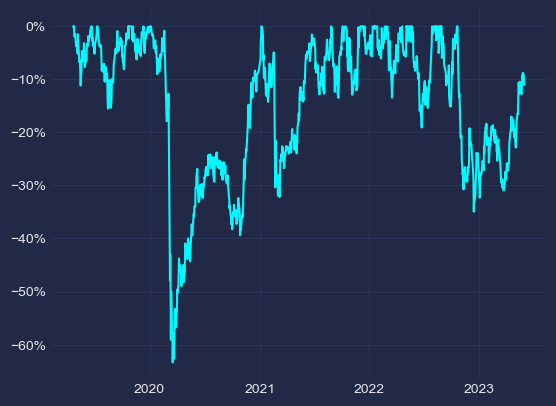

In [6]:
fix, ax = plt.subplots()

ax.plot(drawdowns.index, drawdowns)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_locator(mdate.YearLocator(1))
plt.show()